In [2]:
import pandas as pd

In [12]:
dnns          = pd.read_csv('dnns-exp-all.csv',index_col=0)
dnns2         = pd.read_csv('dnns2-exp-all.csv',index_col=0)
old_reg_dnn   = pd.read_csv('old-reg-dnn.csv',index_col=0)
old_split_dnn = pd.read_csv('old-split-dnn.csv',index_col=0)
old_split_ols = pd.read_csv('old-split-ols.csv',index_col=0)

In [13]:
resdf = pd.DataFrame(index=dnns.index)
resdf['dnns']        = dnns['dnns']
resdf['dnns2']       = dnns2['dnns2']
resdf['regular_dnn'] = old_reg_dnn['regular_dnn']
resdf['split_dnn']   = old_split_dnn['split_dnn']
resdf['split_ols']   = old_split_ols['split_ols']

In [14]:
resdf

,dnns,dnns2,regular_dnn,split_dnn,split_ols
1M,0.001016,0.001109,0.001701,0.003584,0.000645
fp_1,0.000140,0.000128,0.000184,0.000169,0.000047
fp_4,0.000118,0.000118,0.000207,0.000260,0.000052
fp_9,0.000104,0.000104,0.000279,0.000004,0.000004
fp_10,0.000164,0.000167,0.000115,0.000376,0.000063
int_0,0.000105,0.000105,0.000066,0.000737,0.000051
int_4,0.000162,0.000163,0.000224,0.000344,0.000064
int_11,0.000055,0.000054,0.000092,0.000099,0.000019
int_15,0.000100,0.000099,0.000113,0.000243,0.122332
srv_10,0.000066,0.000060,0.000204,0.000469,0.000066


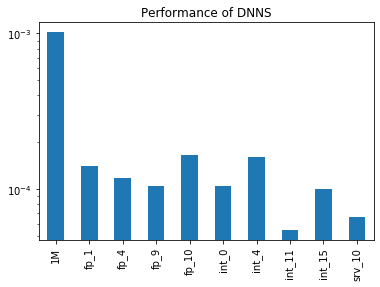

In [19]:
# dnns performance alone
resdf['dnns'].plot.bar(logy=True, title='Performance of DNNS')

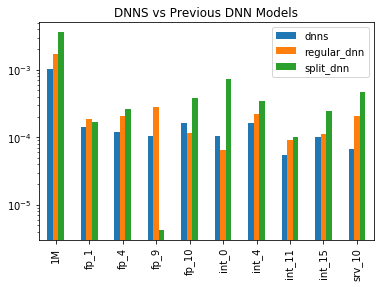

In [20]:
# dnns vs old dnn models
resdf[['dnns', 'regular_dnn', 'split_dnn']].plot.bar(logy=True, title='DNNS vs Previous DNN Models')

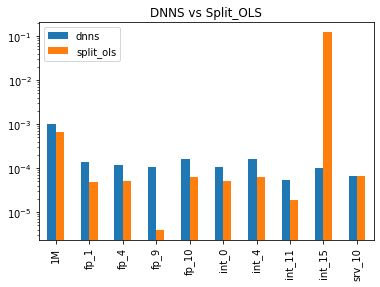

In [21]:
# dnns vs split ols
resdf[['dnns', 'split_ols']].plot.bar(logy=True, title='DNNS vs Split_OLS')

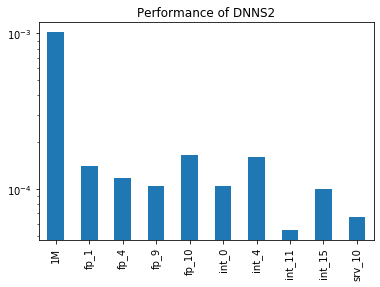

In [22]:
# dnns2 performance
resdf['dnns'].plot.bar(logy=True, title='Performance of DNNS2')

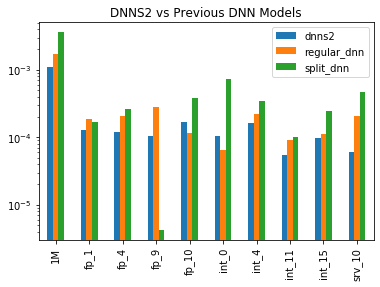

In [23]:
# dnns2 vs older dnn modles
resdf[['dnns2', 'regular_dnn', 'split_dnn']].plot.bar(logy=True, title='DNNS2 vs Previous DNN Models')

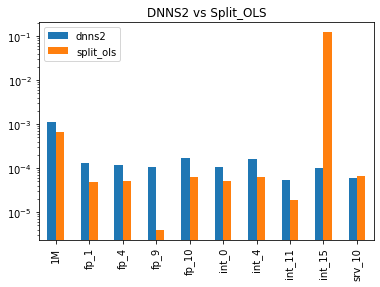

In [24]:
# dnns vs split ols
resdf[['dnns2', 'split_ols']].plot.bar(logy=True, title='DNNS2 vs Split_OLS')

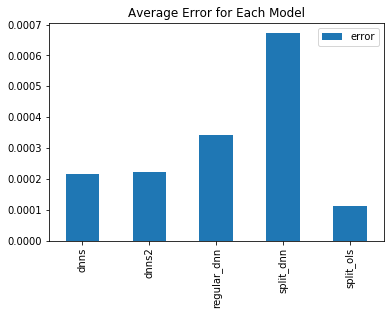

In [26]:
# Average of each model without int_15
comp = pd.DataFrame(columns=['error'])
comp.loc['dnns']  = resdf['dnns'].drop('int_15').mean()
comp.loc['dnns2'] = resdf['dnns2'].drop('int_15').mean()
comp.loc['regular_dnn'] = resdf['regular_dnn'].drop('int_15').mean()
comp.loc['split_dnn'] = resdf['split_dnn'].drop('int_15').mean()
comp.loc['split_ols'] = resdf['split_ols'].drop('int_15').mean()
comp.plot.bar(title='Average Error for Each Model')

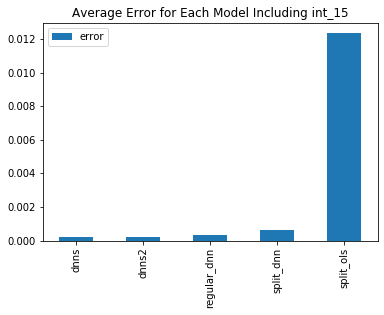

In [27]:
# Average of each model with int_15
comp = pd.DataFrame(columns=['error'])
comp.loc['dnns']  = resdf['dnns'].mean()
comp.loc['dnns2'] = resdf['dnns2'].mean()
comp.loc['regular_dnn'] = resdf['regular_dnn'].mean()
comp.loc['split_dnn'] = resdf['split_dnn'].mean()
comp.loc['split_ols'] = resdf['split_ols'].mean()
comp.plot.bar(title='Average Error for Each Model Including int_15')

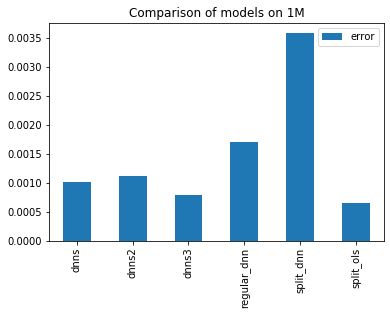

In [36]:
df1m = pd.DataFrame(columns=['error'])
df1m.loc['dnns']  = resdf.loc['1M', 'dnns']
df1m.loc['dnns2'] = resdf.loc['1M', 'dnns2']
df1m.loc['dnns3'] = pd.read_csv('dnns3-exp-1M.csv', index_col=0).loc['1M', 'dnns3']
df1m.loc['regular_dnn'] = resdf.loc['1M', 'regular_dnn']
df1m.loc['split_dnn'] = resdf.loc['1M', 'split_dnn']
df1m.loc['split_ols'] = resdf.loc['1M', 'split_ols']
df1m.plot.bar(title='Comparison of models on 1M')